In [1]:
import pandas as pd 
df_students = pd.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv",delimiter=',',header='infer')

In [2]:
df_students=df_students.dropna(axis=0,how="any")
passes=pd.Series(df_students["Grade"]>=60)
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [3]:
df_students=pd.concat([df_students,passes.rename("pass")],axis=1)
df_students.head()

,Name,StudyHours,Grade,pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


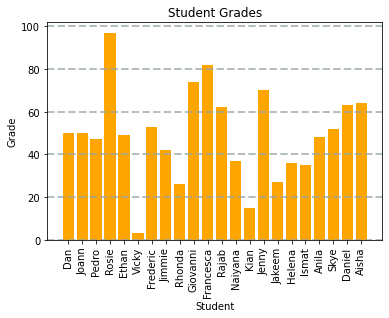

<Figure size 576x216 with 0 Axes>

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()
fig = plt.figure(figsize=(8,3))

Text(0.5, 0.98, 'Student Data')

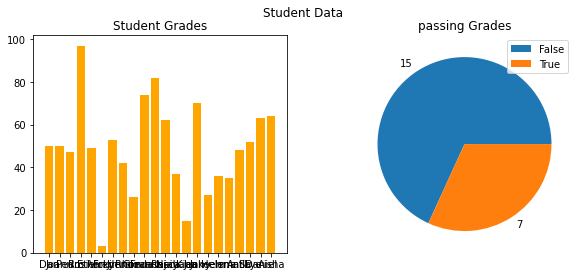

In [5]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Student Grades')
pass_counts=df_students["pass"].value_counts()
ax[1].pie(pass_counts,labels=pass_counts)
ax[1].set_title("passing Grades")
ax[1].legend(pass_counts.keys().tolist())
fig.suptitle("Student Data")

<AxesSubplot:xlabel='Name'>

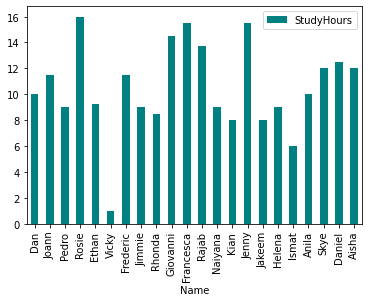

In [6]:
df_students.plot.bar(x="Name",y="StudyHours",color="teal",figsize=(6,4))

(array([1., 1., 2., 3., 4., 4., 3., 2., 1., 1.]),
 array([ 3. , 12.4, 21.8, 31.2, 40.6, 50. , 59.4, 68.8, 78.2, 87.6, 97. ]),
 <BarContainer object of 10 artists>)

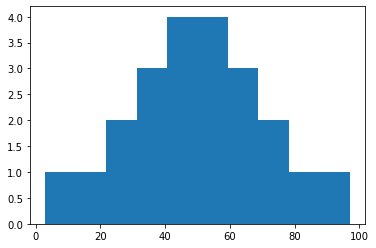

In [7]:
var_data=df_students["Grade"]
plt.hist(var_data)

Minimum:49.18
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\lenovo\AppData\Local\Temp\ipykernel_1756\1873726335.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


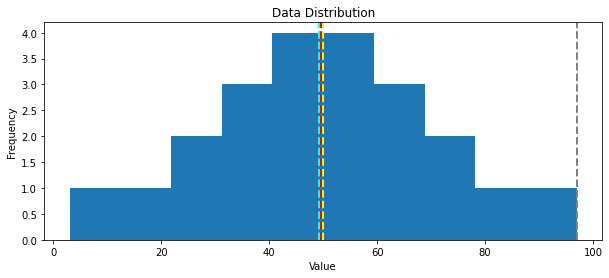

In [8]:
var=df_students["Grade"]
min_val=var.mean()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2000225a520>,
 'caps': [<matplotlib.lines.Line2D at 0x2000225abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2000225a250>],
 'medians': [<matplotlib.lines.Line2D at 0x200022690d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200022693a0>],
 'means': []}

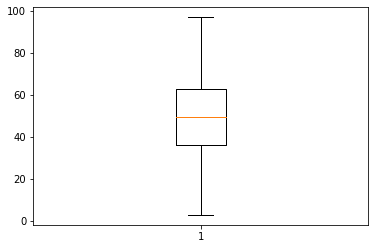

In [9]:
plt.boxplot(var)

<AxesSubplot:xlabel='Name'>

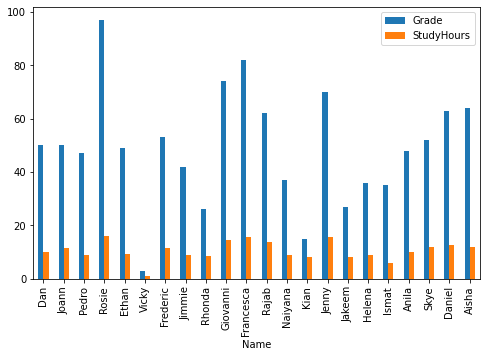

In [10]:
df_students.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_normalized=df_students[["Name","Grade","StudyHours"]].copy()

<AxesSubplot:xlabel='Name'>

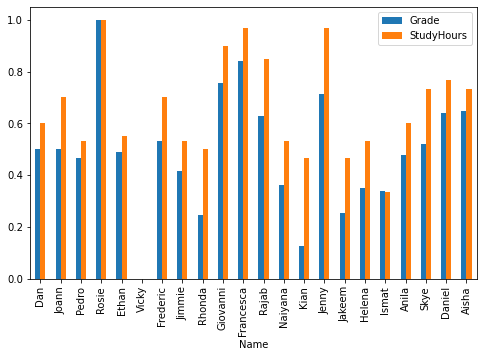

In [12]:
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [13]:
df_normalized.head()

,Name,Grade,StudyHours
0,Dan,0.500000,0.600000
1,Joann,0.500000,0.700000
2,Pedro,0.468085,0.533333
3,Rosie,1.000000,1.000000
4,Ethan,0.489362,0.550000


In [14]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9254280509006746

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

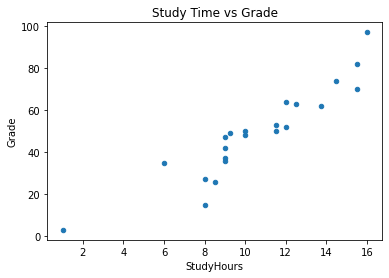

In [15]:
df_students.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

In [16]:
from scipy import stats
df_regression=df_students[["Grade","StudyHours"]].copy()

slope: 5.7689
y-intercept: -11.5224
so...
 f(x) = 5.7689x + -11.5224


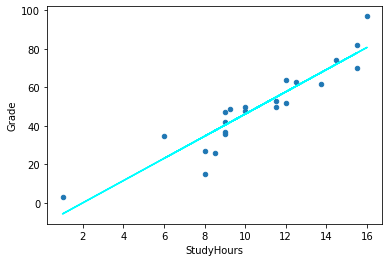

In [17]:
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [18]:
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,46.166274,-3.833726
1,11.50,50.0,54.819575,4.819575
2,9.00,47.0,40.397406,-6.602594
3,16.00,97.0,80.779481,-16.220519
4,9.25,49.0,41.839623,-7.160377
5,1.00,3.0,-5.753538,-8.753538
6,11.50,53.0,54.819575,1.819575
7,9.00,42.0,40.397406,-1.602594
8,8.50,26.0,37.512972,11.512972
9,14.50,74.0,72.126179,-1.873821


In [19]:
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70
